### House Prices: Advanced Regression Techniques


In [522]:
#Importing the packages and csv


In [725]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')


In [726]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [727]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [728]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [729]:
# check the rows and columns
train.shape

(1460, 81)

In [730]:
test.shape

(1459, 80)

In [731]:
# To see what kind of data types we have in the data
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [732]:
#To see stats summary of whole data 
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The summary gives us insight about each of the feature. 
Mean LotArea of these homes is 10516 sq feet.
Mean YearBuilt is around 1971, with homes as old as 1872 and as new as 2010.
Mean Year of remodelling is around 1984.


In [733]:
#Removing the 'Id' column from test and train as it doesn't add any value to our dependent variable.

train_ID = train['Id']
test_ID = test['Id']

train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)


In [734]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


<h3>SalePrice - The Dependent Variable</h3>

In [735]:
#descriptive statistics summary of Sales price
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

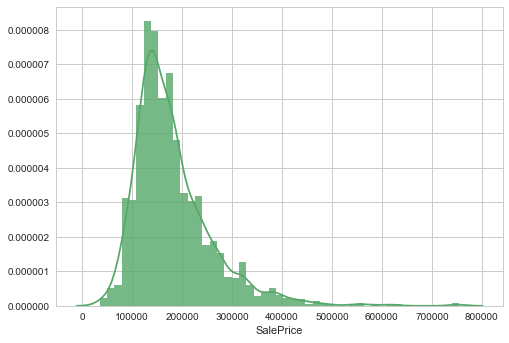

In [736]:
# shows the sales price is right skewed
sns.distplot(train['SalePrice'], kde = True, color = 'g', hist_kws={'alpha': 0.8})

In [737]:
#log transform the target variable
train["SalePrice"] = np.log1p(train["SalePrice"])

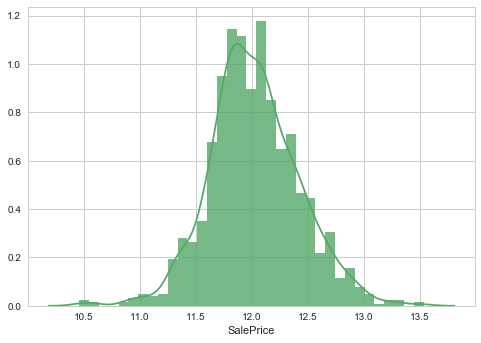

In [738]:
#check the distribution after log transformation
sns.distplot(train['SalePrice'], kde = True, color = 'g', hist_kws={'alpha': 0.8})

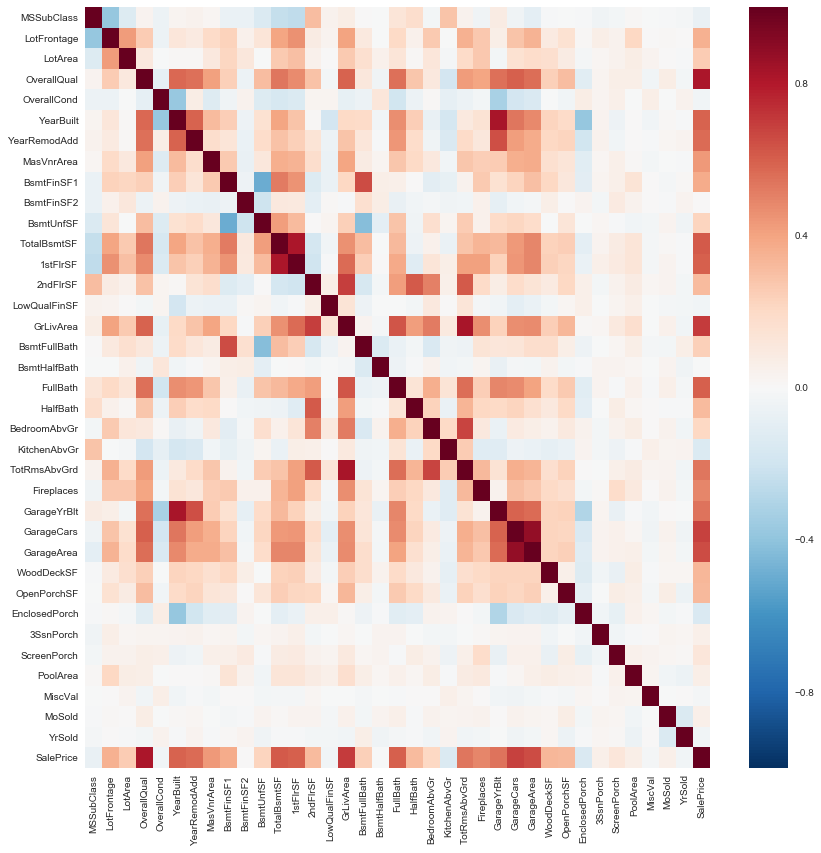

In [739]:
corr = train.corr()
 
# Heatmap
#sns.heatmap(corr)
plt.figure(figsize=(14,14))
#ax=subplot(111)
sns.heatmap(corr)

In [740]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List of numerical features by their correlation with Sale Price in descending order:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}- \t{1}".format(*ele))

List of numerical features by their correlation with Sale Price in descending order:

OverallQual- 	0.8171846144867654
GrLivArea- 	0.7009269871427154
GarageCars- 	0.6806248726581887
GarageArea- 	0.6508876811435949
TotalBsmtSF- 	0.6121342283262261
1stFlrSF- 	0.596981323185535
FullBath- 	0.5947706649972533
YearBuilt- 	0.5865701927897146
YearRemodAdd- 	0.5656077814623213
GarageYrBlt- 	0.5410727772673495
TotRmsAbvGrd- 	0.5344224002094375
Fireplaces- 	0.48944954515747635
MasVnrArea- 	0.4308089564200273
BsmtFinSF1- 	0.37202325313637
LotFrontage- 	0.3558786203664004
WoodDeckSF- 	0.3341351729561169
OpenPorchSF- 	0.32105325159091125
2ndFlrSF- 	0.31930013887847447
HalfBath- 	0.3139822242567296
LotArea- 	0.2573200650671406
BsmtFullBath- 	0.2362241608485942
BsmtUnfSF- 	0.2219851646403658
BedroomAbvGr- 	0.209043433025741
EnclosedPorch- 	-0.1490502261307153
KitchenAbvGr- 	-0.14754815783155917
ScreenPorch- 	0.12120758839907944
MSSubClass- 	-0.07395916536241498
PoolArea- 	0.0697978953585965
MoSold- 	0

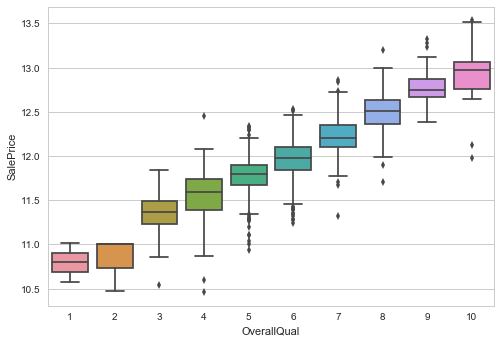

In [741]:
#bivariate analysis saleprice and OverallQual


sns.boxplot(x="OverallQual", y="SalePrice", data=train)


In [742]:
#combining all data that is train and test in one so that feature analysis and changes can be done to all data.
y_trainSave = train.SalePrice.values
full_data = pd.concat((train, test)).reset_index(drop=True)
full_data.drop(['SalePrice'], axis=1, inplace=True)
print("full_data size is : {}".format(full_data.shape))

full_data size is : (2919, 79)


In [743]:
full_data_na = (full_data.isnull().sum())
full_data_na = full_data_na.drop(full_data_na[full_data_na == 0].index).sort_values(ascending=False)[:80]
missing_data = pd.DataFrame({'Missing values' :full_data_na})
missing_data.head(40)

#missing_data.shape

,Missing values
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageCond,159
GarageFinish,159
GarageYrBlt,159


In [744]:
# Replacing NA values one by one for each feature that we found to have missing values.

PoolQC : Has maximum missing values and data description says NA means "No Pool". 
This means most of the houses have no Pool at all in general.

In [745]:
#PoolQC : Has heighest missing values with NA written. It can be assumed that NA means "No Pool". So most of the houses are without pool.
full_data["PoolQC"] = full_data["PoolQC"].fillna("None")

In [746]:
#MiscFeature : description says NA, which possibly means "no misc feature" so it can be changed to 'None'
full_data["MiscFeature"] = full_data["MiscFeature"].fillna("None")

In [747]:
#Alley : description says NA it possibly means "no alley access", so it can be changed to "NoAccess"
full_data["Alley"] = full_data["Alley"].fillna("NoAccess")

In [748]:
#Fence : data description says NA means "no fence"
full_data["Fence"] = full_data["Fence"].fillna("None")

In [749]:
#FireplaceQu : data description says NA means "no fireplace"
full_data["FireplaceQu"] = full_data["FireplaceQu"].fillna("NoFireplace")

In [750]:
#LotFrontage : fill in missing value by the median LotFrontage of all the neighborhood
full_data["LotFrontage"] = full_data["LotFrontage"].fillna(full_data["LotFrontage"].mode()[0])

In [751]:
# GarageQual, GarageCond, GarageFinish and GarageType, : Replacing missing data with 'None' as it mostly indicates 
# that there is no garage thats why these fiels were left NA
full_data["GarageQual"] = full_data["GarageQual"].fillna("None")
full_data["GarageCond"] = full_data["GarageCond"].fillna("None")
full_data["GarageFinish"] = full_data["GarageFinish"].fillna("None")
full_data["GarageType"] = full_data["GarageType"].fillna("None")

In [752]:
#GarageYrBlt, GarageArea and GarageCars have NAs which means there is no Garage in these homes so we replace them with '0'.
full_data["GarageYrBlt"] = full_data["GarageYrBlt"].fillna(0)
full_data["GarageArea"] = full_data["GarageArea"].fillna(0)
full_data["GarageCars"] = full_data["GarageCars"].fillna(0)

In [753]:
# For BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : replacing missing values with zero as missing value 
#indicates no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    full_data[col] = full_data[col].fillna(0)

In [754]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : these categorical basement-related features, 
#NaN means that there is no basement so we replace with None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    full_data[col] = full_data[col].fillna('None')

In [755]:
#MasVnrArea and MasVnrType : NA most probably means there is no mason veneer for these houses. 
#We can fill 0 for the area and None for the type.
full_data["MasVnrType"] = full_data["MasVnrType"].fillna("None")
full_data["MasVnrArea"] = full_data["MasVnrArea"].fillna(0)

In [756]:
#MSZoning : So we can fill in missing values with 'RL' as it is the most common value
full_data['MSZoning'] = full_data['MSZoning'].fillna(full_data['MSZoning'].mode()[0])

In [757]:
#Utilities : All records for this one are "AllPub", except for one "NoSeWa" and 2 NA . 
#As this feature has only one value there is no point keeping it as it is doesn't affect the prediction.
full_data = full_data.drop(['Utilities'], axis=1)

In [758]:
#Functional : Replacing NA withi most accouring value which is "Typ"
full_data["Functional"] = full_data["Functional"].fillna(full_data['Functional'].mode()[0])


In [759]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
#KitchenQual: It has one NA and so replacing it with most occuring value 'TA'
full_data['Electrical'] = full_data['Electrical'].fillna(full_data['Electrical'].mode()[0])
full_data['KitchenQual'] = full_data['KitchenQual'].fillna(full_data['KitchenQual'].mode()[0])

In [760]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
#We will just substitute in the most common string
full_data['Exterior1st'] = full_data['Exterior1st'].fillna(full_data['Exterior1st'].mode()[0])
full_data['Exterior2nd'] = full_data['Exterior2nd'].fillna(full_data['Exterior2nd'].mode()[0])

#SaleType : Fill in again with most frequent which is "WD"
full_data['SaleType'] = full_data['SaleType'].fillna(full_data['SaleType'].mode()[0])

In [761]:
#Checking to see if we have taken care of all missing values.
full_data_na = (full_data.isnull().sum())
full_data_na = full_data_na.drop(full_data_na[full_data_na == 0].index).sort_values(ascending=False)[:80]
missing_data = pd.DataFrame({'Missing values' :full_data_na})
missing_data.head(40)
#missing_data.shape

,Missing values


In [762]:
#Transforming these numerical variables into categorical as they basically are classficiation variables.

#MSSubClass has values like 20,40, 45, 60 upto 190. 
full_data['MSSubClass'] = full_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable as it has values from 1 to 9.
full_data['OverallCond'] = full_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features. Month sold are basically 1 to 12 depending on the month and 
#year sold values are from 2006 to 2019
full_data['YrSold'] = full_data['YrSold'].astype(str)
full_data['MoSold'] = full_data['MoSold'].astype(str)

In [763]:
full_data = pd.get_dummies(full_data)
print(full_data.shape)
full_data.head()

(2919, 338)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,0,1,0,0,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,0,1,0,1,0,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,0,1,0,0,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,1,1,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,0,1,0,0,1,0,0


In [764]:
X= full_data
X.shape

(2919, 338)

<h2>Modelling</h2>

In [765]:
train_X = full_data[:train.shape[0]]
test_X = full_data[train.shape[0]:]
train_y = train.SalePrice



In [766]:
#Importing the models and their methods

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

In [767]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=30).get_n_splits(train_X)
    rmse= np.sqrt(-cross_val_score(model, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<h3>Lasso Regression</h3>

In [768]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [769]:
score = rmsle_cv(lasso)
print(score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[ 0.10531348  0.14652607  0.13051973  0.10878072  0.18498998]

Lasso score: 0.1352 (0.0291)



In [770]:
#genearting the predictions with Lasso
lasso.fit(train_X, train_y)
lasso_preds = np.expm1(lasso.predict(test_X))
lasso_preds

array([ 119096.78587525,  151689.78872585,  173772.29861826, ...,
        165421.42875978,  115211.58166098,  226965.26833816])

In [675]:
#sub = pd.DataFrame()
#sub['Id'] = test_ID
#sub['SalePrice'] = preds
#sub.to_csv('submission1.csv',index=False)

<h3>Elastic Net Regression</h3>

In [771]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0006, l1_ratio=.9, random_state=3))

In [772]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1350 (0.0287)



Elastic Net model gives a good score, comparable to the Lasso model. 

In [773]:
#genearting the predictions with Enet model
ENet.fit(train_X, train_y)
ENet_preds = np.expm1(ENet.predict(test_X))
ENet_preds


array([ 118653.78887569,  151044.58765063,  173145.60244313, ...,
        164424.31585653,  115263.92989887,  227877.58748569])

In [679]:
#generating csv to test submission score with ENet
#sub = pd.DataFrame()
#sub['Id'] = test_ID
#sub['SalePrice'] = GBoost_preds
#sub.to_csv('submission_ENet.csv',index=False)

<h3>Ridge Model</h3>

In [774]:
KRR = KernelRidge(alpha=0.8, kernel='linear', degree=1, coef0=2.5)

In [775]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1469 (0.0270)



In [776]:
#genearting the predictions with KKR
KRR.fit(train_X, train_y)
KRR_preds = np.expm1(KRR.predict(test_X))
KRR_preds

array([ 119179.42868552,  150020.70048939,  177174.56022669, ...,
        162302.37413198,  114369.76370254,  221609.66840463])

Kernel Ridge regression gives the worst score out of all models I tried, so I will not use this for the final ensemble.

<h3>Gradient Boost Model</h3>

In [777]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [778]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1252 (0.0139)



Gradient boost seems to give best RMSE score

In [779]:
GBoost.fit(train_X, train_y)
GBoost_preds = np.expm1(GBoost.predict(test_X))
GBoost_preds

array([ 124426.90964699,  157867.58223409,  195768.89804464, ...,
        153888.30002622,  116076.00488172,  219035.42319332])

In [665]:
#sub = pd.DataFrame()
#sub['Id'] = test_ID
#sub['SalePrice'] = GBoost_preds
#sub.to_csv('submission_GBoost.csv',index=False)

<h3>Ensemble Model</h3>
I tried submitting predictions based on each of the models above and decided to use a weighted average of all 3 models that performed relatively better. Taking the below weighted average gives the best submission score out of all models. 

In [780]:
#Taking a  weighted average of three models that gave best scores.
preds = 0.2*lasso_preds + 0.5*GBoost_preds + 0.3*ENet_preds
preds

array([ 121628.94866125,  154585.12515741,  184582.58947891, ...,
        159355.73052202,  115659.49774272,  223274.04151   ])

In [ ]:
#generating the csv file for submission on Kaggle
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = GBoost_preds
sub.to_csv('submission_average2L_5G_3E.csv',index=False)

<h3>Conclusion</h3> 
I tried using Lasso, ElasticNet, Ridge(KKR) and GradientBoost models and found that Lasso, ElasticNet and GBoost had better RMSE scores. I tried submitting the predictions based on individual models but the best result was achieved when I took a weighted average of these three. I tried different combinations of weights but the best combination was 0.2 Lasso, 0.5 GBoost and 0.3 ElasticNet which gave 0.12295 submission score on Kaggle. 